In [1]:
import xarray as xr
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

from data_processor import DataProcessor
from regressor import Regressor

In [2]:
ds = xr.open_dataset("../data.grib")
t2m_numpy = ds.t2m.to_numpy()
sp_numpy = ds.sp.to_numpy()
data = np.stack((t2m_numpy, sp_numpy), axis=-1)

AUTOREG_SEQUENCE_LENGTH = 2
processor = DataProcessor(data)
X, y = processor.preprocess(AUTOREG_SEQUENCE_LENGTH)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [3]:
X.shape

(1079, 1, 25, 45, 2)

In [4]:
X_train.shape, y_train.shape

((863, 1, 25, 45, 2), (863, 25, 45, 2))

In [5]:
linearreg = Regressor(X.shape)
linearreg.train(X_train, y_train)

In [6]:
X_new = X.reshape(-1, AUTOREG_SEQUENCE_LENGTH-1, 25, 45, 2)
y_new = y.reshape(-1, 25, 45, 2)

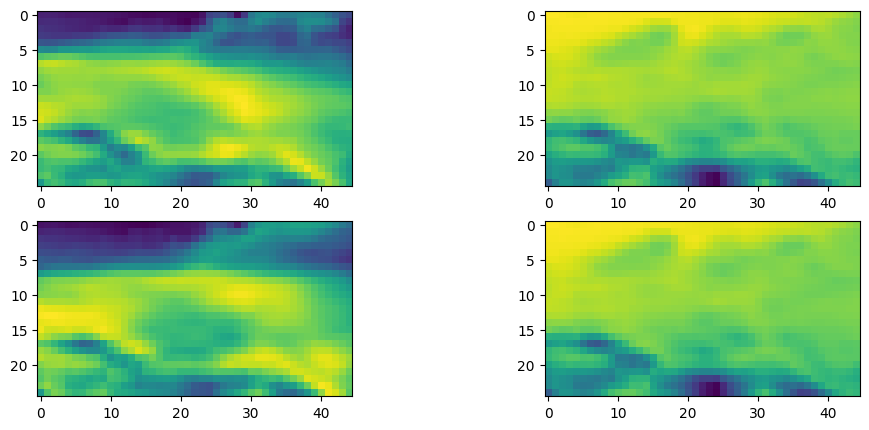

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax[0,0].imshow(X_new[0, -1, :, :, 0])
ax[0,1].imshow(X_new[0, -1, :, :, 1])
ax[1,0].imshow(y_new[0, :, :, 0])
ax[1,1].imshow(y_new[0, :, :, 1])

In [8]:
X_new.shape, X_test.shape

((1079, 1, 25, 45, 2), (216, 1, 25, 45, 2))

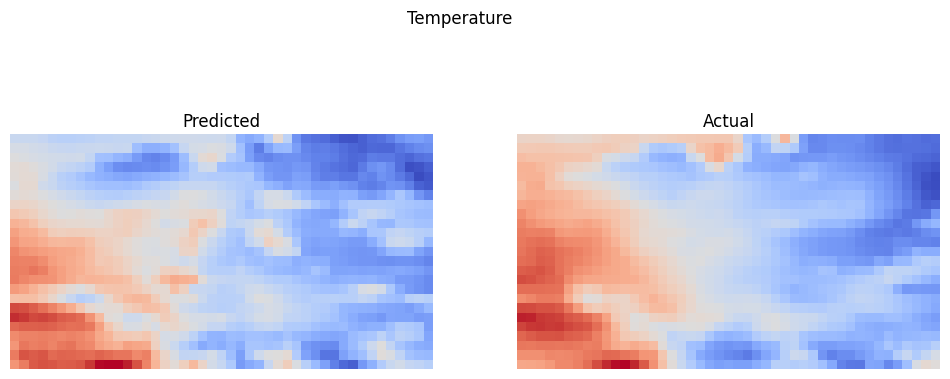

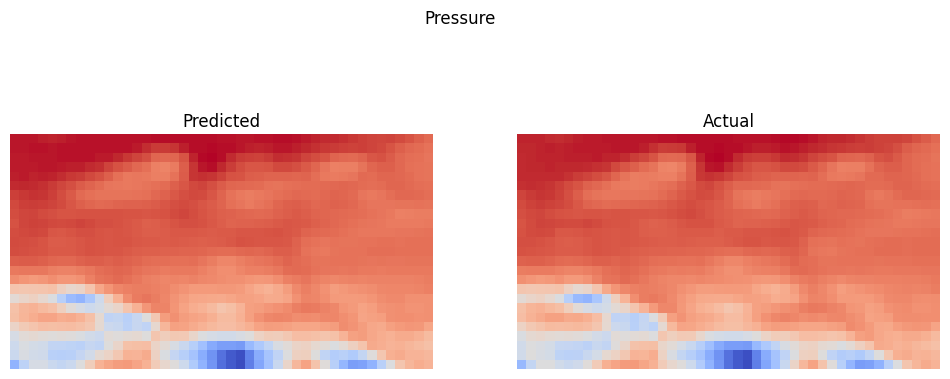

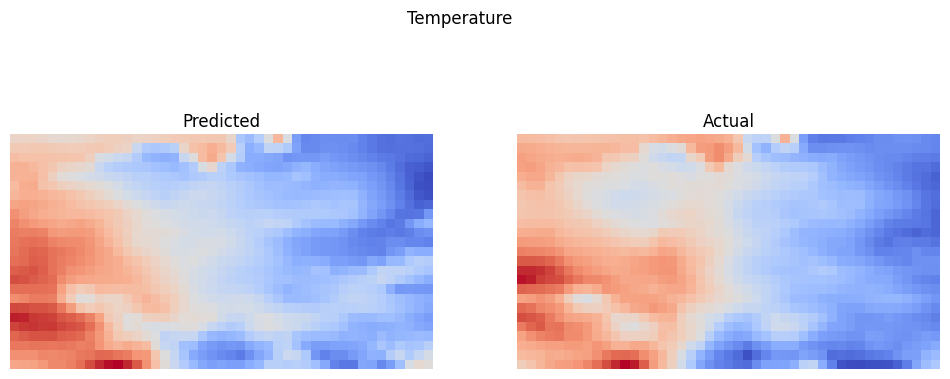

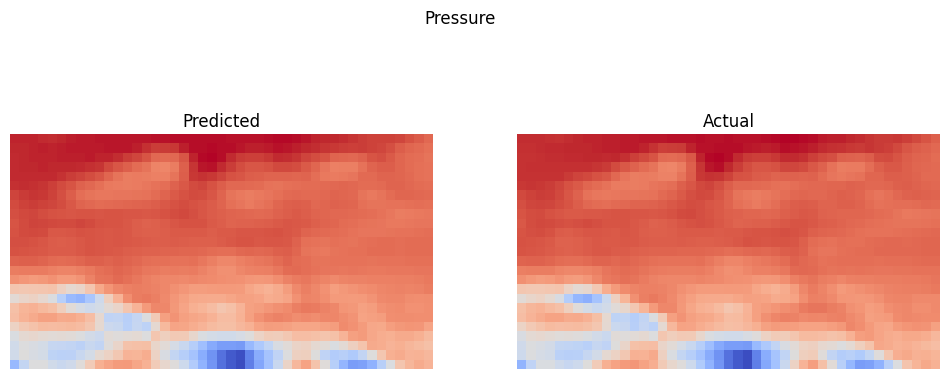

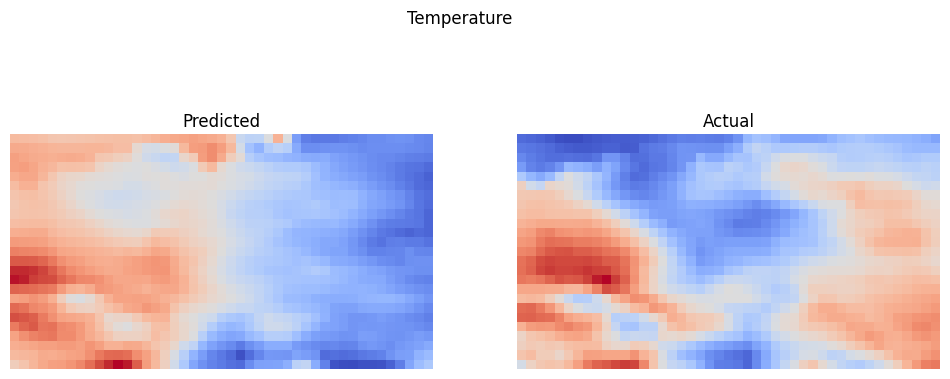

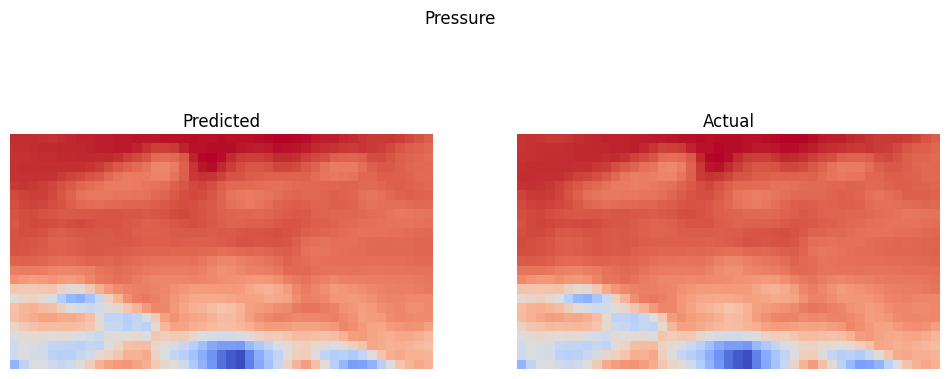

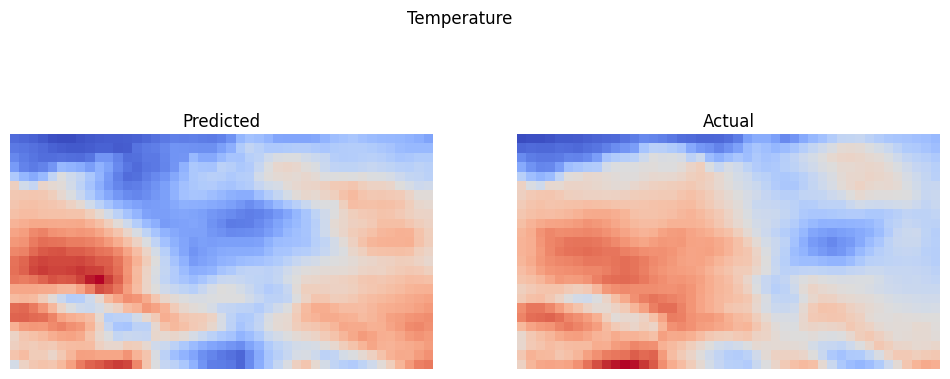

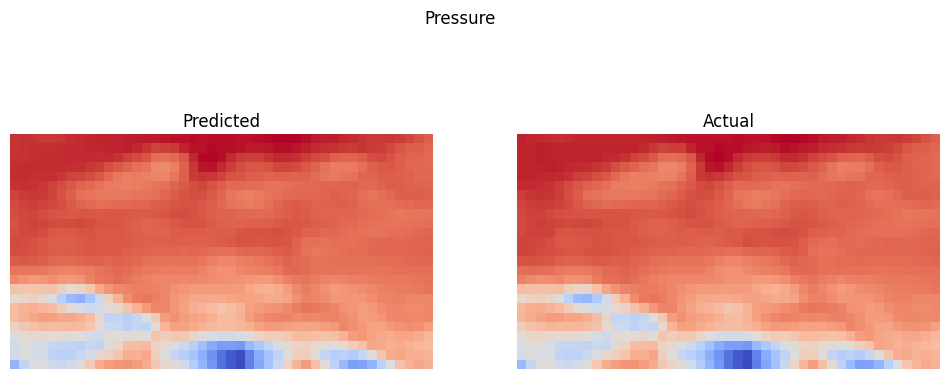

In [9]:
y_hat = linearreg.predict_and_evaluate(X_test, y_test, limit=4)

In [10]:
from itertools import permutations
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma


my_list = [0, 1, 2, 3]
all_permutations = list(permutations(my_list))

for perm in all_permutations:
    yh = y_hat.reshape(-1, 25, 45, 2)
    yh = yh.transpose(perm)
    
    masked_yh = ma.masked_array(yh[0, :, :, 0], mask=(yh[0, :, :, 0] == 0))
    masked_yh = ma.masked_values(masked_yh, 1, copy=False)

    plt.imshow(masked_yh.filled(0))
    plt.title('Position Permutation: ' + str(perm))
    plt.show()
    

    masked_yh = ma.masked_array(yh[:, 0, :, 0], mask=(yh[:, 0, :, 0] == 0))
    masked_yh = ma.masked_values(masked_yh, 1, copy=False)

    plt.imshow(masked_yh.filled(0))
    plt.title('Position Permutation: ' + str(perm))
    plt.show()
    
    
    masked_yh = ma.masked_array(yh[:, :, 0, 0], mask=(yh[:, :, 0, 0] == 0))
    masked_yh = ma.masked_values(masked_yh, 1, copy=False)
    
    plt.imshow(masked_yh.filled(0))
    plt.title('Position Permutation: ' + str(perm))
    plt.show()
    
    
    masked_yh = ma.masked_array(yh[0, 0, :, :], mask=(yh[0, 0, :, :] == 0))
    masked_yh = ma.masked_values(masked_yh, 1, copy=False)

    plt.imshow(masked_yh.filled(0))
    plt.title('Position Permutation: ' + str(perm))
    plt.show()
    
    
    masked_yh = ma.masked_array(yh[0, :, 0, :], mask=(yh[0, :, 0, :] == 0))
    masked_yh = ma.masked_values(masked_yh, 1, copy=False)

    plt.imshow(masked_yh.filled(0))
    plt.title('Position Permutation: ' + str(perm))
    plt.show()

    
    masked_yh = ma.masked_array(yh[:, 0, 0, :], mask=(yh[:, 0, 0, :] == 0))
    masked_yh = ma.masked_values(masked_yh, 1, copy=False)

    plt.imshow(masked_yh.filled(0))
    plt.title('Position Permutation: ' + str(perm))
    plt.show()


AttributeError: 'NoneType' object has no attribute 'reshape'

In [ ]:
yh = y_hat.reshape(-1, 25, 45, 2)
yh = yh.transpose((3,1,2,0))
# plt.imshow(yh[0, :, :, 0])
plt.imshow(yh[0,:,:,0])

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(12, 5))
ax[0,0].imshow(X_test[0, -1, :, :, 0])
ax[0,1].imshow(X_test[0, -1, :, :, 1])
ax[0,2].imshow(X_train[0, -1, :, :, 0])
ax[0,3].imshow(X_train[0, -1, :, :, 1])
ax[1,0].imshow(y_test[0, :, :, 0])
ax[1,1].imshow(y_test[0, :, :, 1])
ax[1,2].imshow(y_train[0, :, :, 0])
ax[1,3].imshow(y_train[0, :, :, 1])
plt.show()

In [ ]:
# plt.figure(figsize=(12,10))
# yy = y[0].reshape(1,-1)
# plt.imshow(yy[:,:10], cmap=plt.cm.coolwarm)
# plt.show()

In [ ]:
class WeatherRegressor:
    def __init__(self):
        self.model = LinearRegression()
    
    def train(self, X_train, y_train):
        num_samples, latitude, longitude, ts, num_features = X_train.shape
        all_features = latitude * longitude * ts * num_features
        X_train_reshaped = X_train.reshape(num_samples, all_features)
        self.model.fit(X_train_reshaped, y_train)
    
    def predict(self, X):
        num_samples, latitude, longitude, ts = X.shape
        num_features = latitude * longitude * ts
        X_reshaped = X.reshape(num_samples, num_features)
        
        return self.model.predict(X_reshaped)

# X_train = np.random.rand(100, 10, 10, 5, 5)  # Example 4D data with shape (num_samples, latitude, longitude, ts)
# y_train = np.random.rand(100)

# # Initialize and train the model
# regressor = WeatherRegressor()
# regressor.train(X_train, y_train)

# Make predictions
# X_test = np.random.rand(10, 10, 5)  # Example test data with the same dimensions (latitude, longitude, ts)
# predictions = regressor.predict(X_test)